In [1]:
import numpy as np
#numpy.random._bit_generator = numpy.random.bit_generator
import agent
import matplotlib.pyplot as plt
import seaborn as sn
from ohlc import ohlc
from portfolio import portfolio
from HierarchicalRiskParity import  HierarchicalRiskParity
import frontier

In [2]:
ohlc_obj = ohlc()
ohlc_obj.load()
portf_obj = portfolio(ohlc=ohlc_obj.ohlc)
td_equity_dict = agent.getTdaPosition(type='EQUITY')
fidelity_equity_dict = agent.getFidelityPosition(type='EQUITY')
td_option_dict = agent.getTdaPosition(type='OPTION')
fidelity_option_dict = agent.getFidelityPosition(type='OPTION')

#Merge
equity_dict = {**td_equity_dict, **fidelity_equity_dict} 
option_dict = {**td_option_dict, **fidelity_option_dict} 

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


symbol
TME      0.457825
EDU      0.440170
INTC     0.399347
XPEV     0.769970
JD       0.470851
WB       0.477350
DIDIY    0.502076
NVDA     0.488238
GOTU     0.932062
BIDU     0.393873
dtype: float64
symbol
TME      0.557414
EDU      0.462652
INTC     0.346421
XPEV     0.892147
JD       0.487259
WB       0.543170
DIDIY    1.035984
NVDA     0.497497
GOTU     1.270103
BIDU     0.410990
dtype: float64


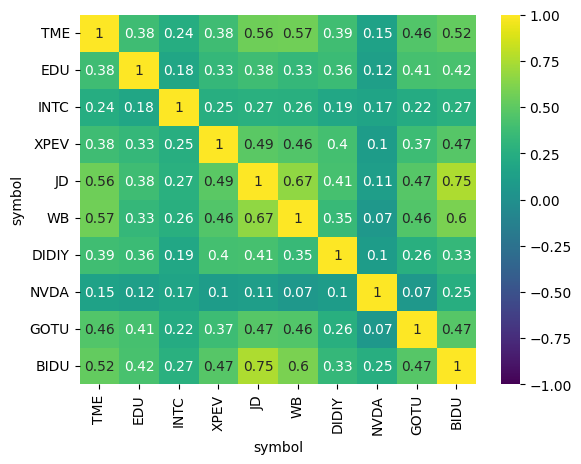

In [3]:
for symbol,pos in  equity_dict.items():
    portf_obj.update_pos(symbol, pos)
    
print (portf_obj.sigma(method='hist') )    
print (portf_obj.sigma(method='garch') )

corr = portf_obj.corr()
heatmap = sn.heatmap(np.round(corr, 2), vmin=-1, vmax=1, annot=True, cmap='viridis')
plt.show()

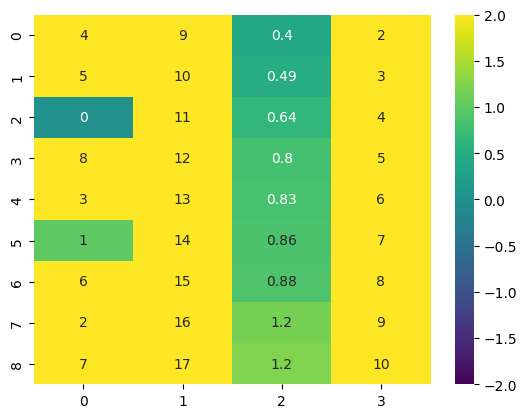

[0.10099511 0.07923718 0.06438044 0.08525885 0.16821909 0.12191082
 0.07793345 0.062957   0.08665012 0.15245794]


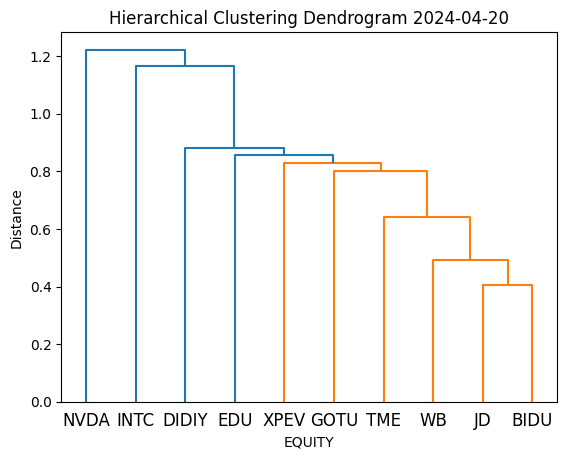

min_risk risk=0.08 Expected return=0.59
symbol
TME      0.11
EDU      0.22
INTC     0.28
XPEV     0.00
JD       0.00
WB      -0.00
DIDIY    0.10
NVDA     0.25
GOTU    -0.00
BIDU     0.04
dtype: float64


/home/hui/.local/lib/python3.8/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


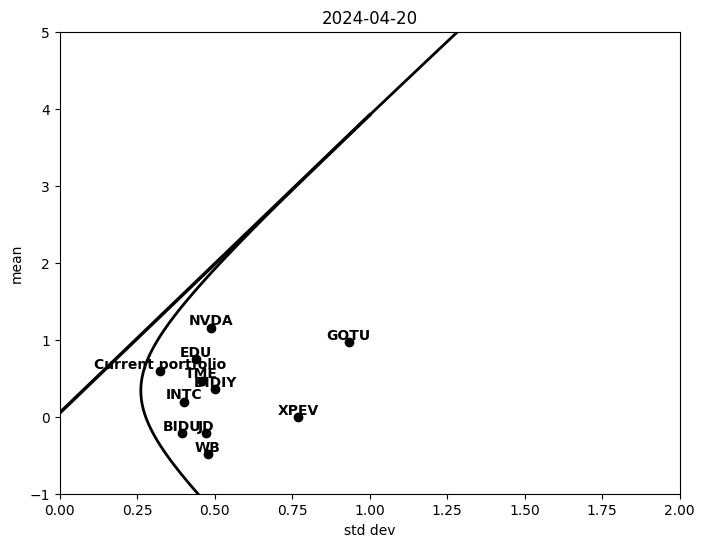

In [4]:
hrp =  HierarchicalRiskParity(portf_obj.corr(), date=ohlc_obj.current_date)


# Perform clustering
hrp.perform_clustering()
heatmap = sn.heatmap(np.round(hrp.linkage_matrix, 2), vmin=-2, vmax=2, annot=True, cmap='viridis')
plt.show()
# Allocate weights
hrp.allocate_weights()
print (hrp.weights)
# Plot the dendrogram
hrp.plot_dendrogram()

    
#plot_points(portf.mu().values, portf.sigma().values, portf.mu().index.to_list())
frontier.plot_points(np.append(portf_obj.mu().values, portf_obj.mu_p()), np.append(portf_obj.sigma().values, portf_obj.sigma_p()),
            portf_obj.mu().index.to_list() + ['Current portfolio'], ohlc_obj.current_date)
frontier.plot_min_var_frontier(portf_obj.mu().values, portf_obj.cov().values)
rf = 0.05
frontier.plot_Capital_Allocation_Line(rf, portf_obj.mu().values, portf_obj.cov().values)
#plt.show()

portf_obj.opt_min_risk()
portf_obj.opt_max_mean_with_sigma()
sigma = portf_obj.sigma_p()
print (portf_obj)